In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

presentation_period= 0.35 #stim presnetation time
presentation_period_cue=  0.50 #presentation of attentional cue time
pre_stim_period= 0.5 #time between cue and stim
resp_time = 4  #time the response is active

In [9]:
path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\signal_all_target_mix_SVM.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\shuff_all_target_mix_SVM.xlsx'
Df_t_m = pd.read_excel(path_save_signal)
Df_shuff = pd.read_excel(path_save_shuffle)

In [10]:
Df_t_m.columns=['decoding', 'times', 'region', 'subject', 'condition', 'label']

In [7]:
sns.set_context("poster", font_scale=1.1) ## poster format
sns.set_style("ticks")

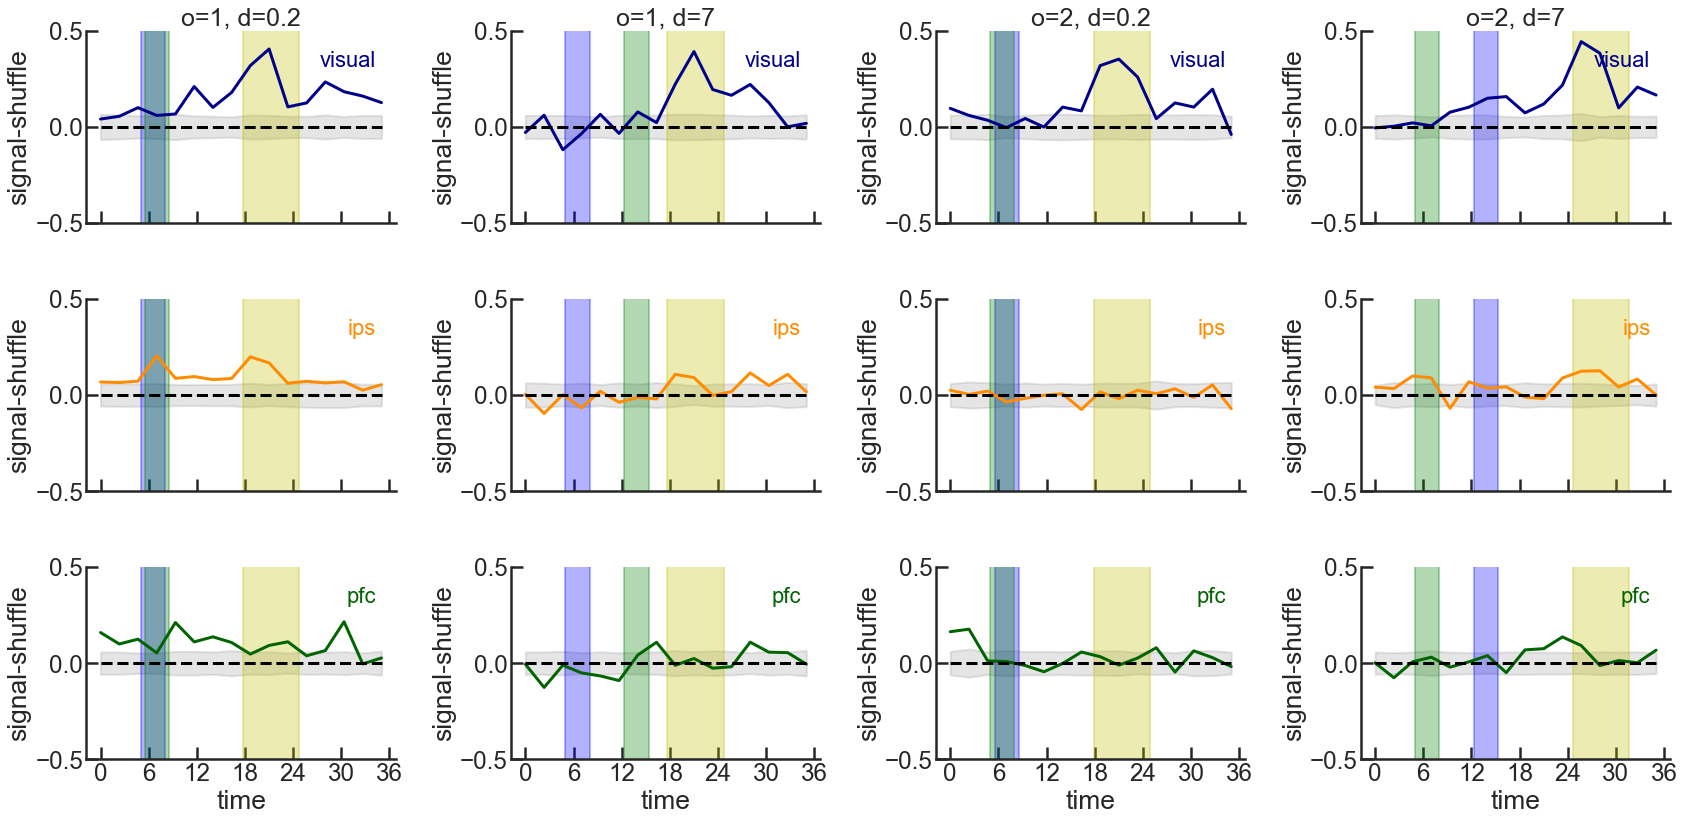

In [18]:
S='l001'

colors=['darkblue',  'darkorange',  'darkgreen']
fig = plt.figure(figsize=(24,12))

# 1,5,9
# 2,6,10
# 3,7,11
# 4,8,12

for idx_c, C in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
    for idx, R in enumerate(['visual', 'ips', 'pfc']):
        ax = fig.add_subplot(3,4, idx*4+ idx_c+1) 

        times = Df_t_m.loc[(Df_t_m['subject']==S) & (Df_t_m['condition']==C)].times.unique()
        dec = Df_t_m.loc[(Df_t_m['subject']==S) & (Df_t_m['condition']==C) & (Df_t_m['region']==R)].decoding
        sh_m = Df_shuff.loc[(Df_shuff['subject']==S) & (Df_shuff['condition']==C) & (Df_shuff['region']==R)].groupby('times').mean()
        sh_sd = Df_shuff.loc[(Df_shuff['subject']==S) & (Df_shuff['condition']==C) & (Df_shuff['region']==R)].groupby('times').std()

        #line of signal
        ax.plot(times, dec-sh_m.decoding.values, color=colors[idx], label=R) #'darkblue'  'darkorange'  'darkgreen'

        ## legend
        l = plt.legend(loc=1, frameon=False, prop={'size': 22})
        l.legendHandles[0].set_visible(False);
        l.get_texts()[0].set_color(colors[idx]);

        ## 0 and shading of shufles
        ax.plot(times, [0 for i in times], 'k--')
        ax.fill_between(times, (sh_m.decoding.values -sh_m.decoding.values) - sh_sd.decoding.values, (sh_m.decoding.values -sh_m.decoding.values) + sh_sd.decoding.values,
                         color='gray', alpha=0.2)

        # aesthetics (remove top and right, spines in)
        ax.spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
        ax.spines['top'].set_visible(False)                                                                                  # remove top spines
        ax.get_xaxis().tick_bottom()                                                                                         
        ax.get_yaxis().tick_left()
        ax.tick_params(direction='in') #direction

        # lims and ticks
        ax.set_ylim(-0.5,0.5)
        #ax.set_yticks([-14,-7,0,7,14])
        ax.set_xticks([0,6,12,18,24,30,36])
        ax.set_xlabel('time')
        ax.set_ylabel('signal-shuffle')
        if idx!=2:
            ax.set_xticklabels(['', '', '','','','',''])
            ax.set_xlabel('')


        # squares of events depending on the condition
        if C == '1_0.2':
            title_='o=1, d=0.2'
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif C == '1_7':
            title_='o=1, d=7'
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif C == '2_0.2':
            title_='o=2, d=0.2'
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [1, 30]

        elif C == '2_7':
            title_='o=2, d=7'
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [1, 36]



        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -5 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = 5 #◙df_all_by_subj.Decoding.max()

        ax.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        ax.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        ax.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response


        ###
        if idx==0:
            plt.title( title_ , fontsize=25) ## main title
    #plt.suptitle( title_ , fontsize=22, ha='left') ## main title

    
#####
#####
plt.tight_layout(h_pad=2) #correct the space between graphs

### Try different methods in one subject

In [10]:
path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\signal_b001_target_mix_SVM_l.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\shuff_b001_target_mix_SVM_l.xlsx'
Df_t_m = pd.read_excel(path_save_signal)
Df_shuff = pd.read_excel(path_save_shuffle)
Df_t_m.columns=['decoding', 'times', 'region', 'subject', 'condition', 'label']


In [11]:
Df_t_m

,decoding,times,region,subject,condition,label
0,0.187500,0.000,visual,b001,1_0.2,signal
1,0.385417,2.335,visual,b001,1_0.2,signal
2,0.364583,4.670,visual,b001,1_0.2,signal
3,0.270833,7.005,visual,b001,1_0.2,signal
4,0.364583,9.340,visual,b001,1_0.2,signal
5,0.333333,11.675,visual,b001,1_0.2,signal
6,0.250000,14.010,visual,b001,1_0.2,signal
7,0.416667,16.345,visual,b001,1_0.2,signal
8,0.593750,18.680,visual,b001,1_0.2,signal
9,0.854167,21.015,visual,b001,1_0.2,signal


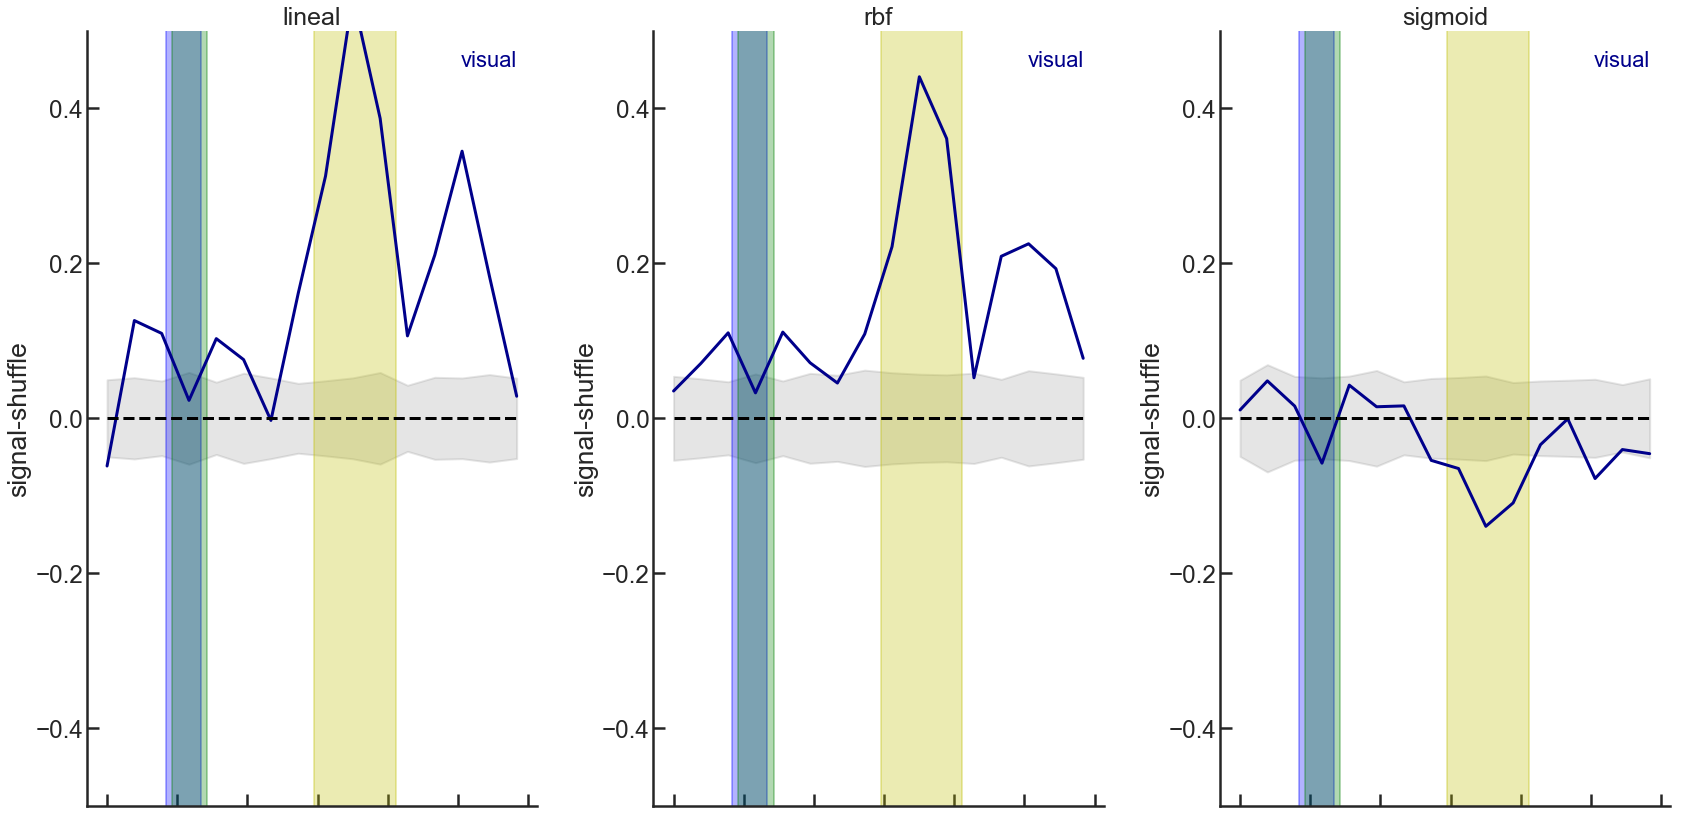

In [14]:
S='b001'

colors=['darkblue',  'darkorange',  'darkgreen']
fig = plt.figure(figsize=(24,12))

df_signals= ['C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\signal_b001_target_mix_SVM_l.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\signal_b001_target_mix_SVM_rbf.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\signal_b001_target_mix_SVM_sig.xlsx']
             
df_shuffs= ['C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\shuff_b001_target_mix_SVM_l.xlsx',
            'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\shuff_b001_target_mix_SVM_rbf.xlsx',
            'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\shuff_b001_target_mix_SVM_sig.xlsx']
            


for idx_met, meth in enumerate(['lineal', 'rbf', 'sigmoid']):
    idx_c=0
    C='1_0.2'
    idx=0
    R='visual'
    #
    path_save_signal = df_signals[idx_met] 
    path_save_shuffle = df_shuffs[idx_met]
    Df_t_m = pd.read_excel(path_save_signal)
    Df_shuff = pd.read_excel(path_save_shuffle)
    Df_t_m.columns=['decoding', 'times', 'region', 'subject', 'condition', 'label']
    
    ax = fig.add_subplot(1, 3 , idx_met+1) 

    times = Df_t_m.loc[(Df_t_m['subject']==S) & (Df_t_m['condition']==C)].times.unique()
    dec = Df_t_m.loc[(Df_t_m['subject']==S) & (Df_t_m['condition']==C) & (Df_t_m['region']==R)].decoding
    sh_m = Df_shuff.loc[(Df_shuff['subject']==S) & (Df_shuff['condition']==C) & (Df_shuff['region']==R)].groupby('times').mean()
    sh_sd = Df_shuff.loc[(Df_shuff['subject']==S) & (Df_shuff['condition']==C) & (Df_shuff['region']==R)].groupby('times').std()

    #line of signal
    ax.plot(times, dec-sh_m.decoding.values, color=colors[idx], label=R) #'darkblue'  'darkorange'  'darkgreen'

    ## legend
    l = plt.legend(loc=1, frameon=False, prop={'size': 22})
    l.legendHandles[0].set_visible(False);
    l.get_texts()[0].set_color(colors[idx]);

    ## 0 and shading of shufles
    ax.plot(times, [0 for i in times], 'k--')
    ax.fill_between(times, (sh_m.decoding.values -sh_m.decoding.values) - sh_sd.decoding.values, (sh_m.decoding.values -sh_m.decoding.values) + sh_sd.decoding.values,
                     color='gray', alpha=0.2)

    # aesthetics (remove top and right, spines in)
    ax.spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    ax.spines['top'].set_visible(False)                                                                                  # remove top spines
    ax.get_xaxis().tick_bottom()                                                                                         
    ax.get_yaxis().tick_left()
    ax.tick_params(direction='in') #direction

    # lims and ticks
    ax.set_ylim(-0.5,0.5)
    #ax.set_yticks([-14,-7,0,7,14])
    ax.set_xticks([0,6,12,18,24,30,36])
    ax.set_xlabel('time')
    ax.set_ylabel('signal-shuffle')
    if idx!=2:
        ax.set_xticklabels(['', '', '','','','',''])
        ax.set_xlabel('')


    # squares of events depending on the condition
    if C == '1_0.2':
        title_='o=1, d=0.2'
        delay1 = 0.2
        delay2 = 11.8
        cue=0
        t_p = cue + presentation_period_cue + pre_stim_period 
        d_p = t_p + presentation_period +delay1 
        r_t = d_p + presentation_period + delay2
        xlim = [1, 30]

    elif C == '1_7':
        title_='o=1, d=7'
        delay1 = 7
        delay2 = 5
        cue=0
        t_p = cue + presentation_period_cue + pre_stim_period 
        d_p = t_p + presentation_period +delay1 
        r_t = d_p + presentation_period + delay2
        xlim = [1, 30]

    elif C == '2_0.2':
        title_='o=2, d=0.2'
        delay1 = 0.2
        delay2 = 12
        cue=0
        d_p = cue + presentation_period_cue + pre_stim_period 
        t_p = d_p + presentation_period +delay1 
        r_t = t_p + presentation_period + delay2   
        xlim = [1, 30]

    elif C == '2_7':
        title_='o=2, d=7'
        delay1 = 7
        delay2 = 12
        cue=0
        d_p = cue + presentation_period_cue + pre_stim_period 
        t_p = d_p + presentation_period +delay1 
        r_t = t_p + presentation_period + delay2
        xlim = [1, 36]



    start_hrf = 4 #start of the Hemodynamic response (4seconds)
    sec_hdrf = 3 #time it can last

    d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
    t_p1 = (start_hrf +t_p) ## strat of target (time)
    r_t1=  (start_hrf + r_t) ## start of response (time)
    #
    d_p2 = d_p1 + sec_hdrf # end of distractor (time)
    t_p2 = t_p1 + sec_hdrf # end of target (time)
    r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

    y_vl_min = -5 #df_all_by_subj.Decoding.min() #values min and max
    y_vl_max = 5 #◙df_all_by_subj.Decoding.max()

    ax.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
    ax.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
    ax.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response


    ###
    if idx==0:
        title_ = meth
        plt.title( title_ , fontsize=25) ## main title
#plt.suptitle( title_ , fontsize=22, ha='left') ## main title

    
#####
#####
plt.tight_layout(h_pad=2) #correct the space between graphs

## Try octaves

In [4]:
path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\signal_b001_target_mix_SVM_oct.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\shuff_b001_target_mix_SVM_oct.xlsx'
Df_t_m = pd.read_excel(path_save_signal)
Df_shuff = pd.read_excel(path_save_shuffle)
Df_t_m.columns=['decoding', 'times', 'region', 'subject', 'condition', 'label']

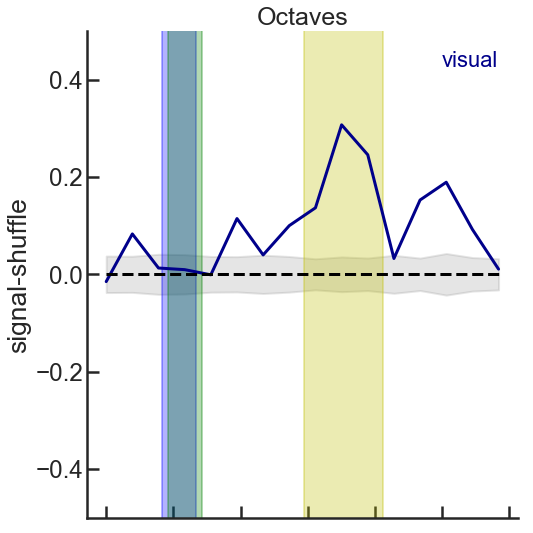

In [11]:
S='b001'

colors=['darkblue',  'darkorange',  'darkgreen']
fig = plt.figure(figsize=(8,8))

idx_c=0
C='1_0.2'
idx=0
R='visual'
#

ax = fig.add_subplot(1, 1, 1) 

times = Df_t_m.loc[(Df_t_m['subject']==S) & (Df_t_m['condition']==C)].times.unique()
dec = Df_t_m.loc[(Df_t_m['subject']==S) & (Df_t_m['condition']==C) & (Df_t_m['region']==R)].decoding
sh_m = Df_shuff.loc[(Df_shuff['subject']==S) & (Df_shuff['condition']==C) & (Df_shuff['region']==R)].groupby('times').mean()
sh_sd = Df_shuff.loc[(Df_shuff['subject']==S) & (Df_shuff['condition']==C) & (Df_shuff['region']==R)].groupby('times').std()

#line of signal
ax.plot(times, dec-sh_m.decoding.values, color=colors[idx], label=R) #'darkblue'  'darkorange'  'darkgreen'

## legend
l = plt.legend(loc=1, frameon=False, prop={'size': 22})
l.legendHandles[0].set_visible(False);
l.get_texts()[0].set_color(colors[idx]);

## 0 and shading of shufles
ax.plot(times, [0 for i in times], 'k--')
ax.fill_between(times, (sh_m.decoding.values -sh_m.decoding.values) - sh_sd.decoding.values, (sh_m.decoding.values -sh_m.decoding.values) + sh_sd.decoding.values,
                 color='gray', alpha=0.2)

# aesthetics (remove top and right, spines in)
ax.spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
ax.spines['top'].set_visible(False)                                                                                  # remove top spines
ax.get_xaxis().tick_bottom()                                                                                         
ax.get_yaxis().tick_left()
ax.tick_params(direction='in') #direction

# lims and ticks
ax.set_ylim(-0.5,0.5)
#ax.set_yticks([-14,-7,0,7,14])
ax.set_xticks([0,6,12,18,24,30,36])
ax.set_xlabel('time')
ax.set_ylabel('signal-shuffle')
if idx!=2:
    ax.set_xticklabels(['', '', '','','','',''])
    ax.set_xlabel('')


# squares of events depending on the condition
if C == '1_0.2':
    title_='o=1, d=0.2'
    delay1 = 0.2
    delay2 = 11.8
    cue=0
    t_p = cue + presentation_period_cue + pre_stim_period 
    d_p = t_p + presentation_period +delay1 
    r_t = d_p + presentation_period + delay2
    xlim = [1, 30]

elif C == '1_7':
    title_='o=1, d=7'
    delay1 = 7
    delay2 = 5
    cue=0
    t_p = cue + presentation_period_cue + pre_stim_period 
    d_p = t_p + presentation_period +delay1 
    r_t = d_p + presentation_period + delay2
    xlim = [1, 30]

elif C == '2_0.2':
    title_='o=2, d=0.2'
    delay1 = 0.2
    delay2 = 12
    cue=0
    d_p = cue + presentation_period_cue + pre_stim_period 
    t_p = d_p + presentation_period +delay1 
    r_t = t_p + presentation_period + delay2   
    xlim = [1, 30]

elif C == '2_7':
    title_='o=2, d=7'
    delay1 = 7
    delay2 = 12
    cue=0
    d_p = cue + presentation_period_cue + pre_stim_period 
    t_p = d_p + presentation_period +delay1 
    r_t = t_p + presentation_period + delay2
    xlim = [1, 36]



start_hrf = 4 #start of the Hemodynamic response (4seconds)
sec_hdrf = 3 #time it can last

d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
t_p1 = (start_hrf +t_p) ## strat of target (time)
r_t1=  (start_hrf + r_t) ## start of response (time)
#
d_p2 = d_p1 + sec_hdrf # end of distractor (time)
t_p2 = t_p1 + sec_hdrf # end of target (time)
r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

y_vl_min = -5 #df_all_by_subj.Decoding.min() #values min and max
y_vl_max = 5 #◙df_all_by_subj.Decoding.max()

ax.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
ax.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
ax.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response


###
if idx==0:
    title_ = 'Octaves'
    plt.title( title_ , fontsize=25) ## main title
#plt.suptitle( title_ , fontsize=22, ha='left') ## main title

    
#####
#####
plt.tight_layout(h_pad=2) #correct the space between graphs

## Octaves with all